# Анализ рынка компьютерных игр

## Вводная часть

**Исходные данные:**

 Имеется датасет, собранный из открытых источников с историческими данные о продажах игр, оценках пользователей и экспертов, жанрах и платформаъы (например, Xbox или PlayStation). 
Нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели проекта:** 
1. Провести общий анализ динамики рынка цифроых игр.
2. Проанализировать общий состав участников рынка, выделив наиболее заметных игроков. 
3. Изучить особенности распределения доходов от игр
4. Проанализировать различные платформы с точки зрения перспектив их доходности
5. Проанализировать корреляцияю между доходами от игр с одной стороны и оценками пользователей/критиков с другой.
6. Проанализировать региональные особенности в распространённости различных игровых платформ, а также популярности
тех или иных жанров.
7. Изучить взаимосвязь между рейтингом ESRB и продажами в отдельных регионах
8. Проверить гипотезы о различиях в пользовательских рейтингах для платформ Xbox One и PC, а также жанров Action и Sports. 

## Общая информация о проекте

In [1]:
#импортируем стандартные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#загружаем датасет
data = pd.read_csv('/datasets/games.csv')

Cоставим общее впечатление о датасете:

In [3]:
data.info();
display(data.describe());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
display(data.head(40))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Средних размеров датасет. В некоторых разделах, судя по количеству non-null значений,  довольно большой процент пропусков.
Некоторые колонки, вероятно, потребуют замены типа. 

## Предобработка данных

### Общая подготовка

#### Преобразование к нижнему регистру

In [5]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:
#проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Приведение данных к соответствующему типу

Очевидно, столбец year_of_release может быть преобразован в int без
потери какой-либо информации. 

In [7]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

In [8]:
#Приведем user_score к типу float, к которому он явно относится. Заодно сделаем то же самое с critic_score, чтобы в дальнейшем
#не было проблем с расчётом корреляции
data['user_score'] = np.floor(pd.to_numeric(data['user_score'], errors='coerce')).astype('float64')
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('float64')

#### Проверка на явные дубликаты

In [9]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено

### Обработка пропусков

#### Анализ пропусков и целесообразность их удаления

In [10]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


В name и genre по два пропуска. Не трогаем. В колонке year_of_release 267 пропусков, однако синтетические значения не будут иметь никакого содержательного смысла в данном случае. Оставляем.
Пропуски по рейтингу и оценке критиков и пользователей составляют львиную долю соответствующих колонок. 
Восстановить по продажам? Но как раз с продажами нам в дальнейшем нужно будет найти корреляцию. А ведь  подобное "восстановление" может внести отсутсвующую корреляцию и исказить корреляционную картину.  
Заменять их средней, медианой и пр., с учётом их огромной пропорции (фактически половина) тоже вряд ли есть смысл - слишком много несуществующей информации мы внесём. 
При оценке успешности игры можно будет опираться на практически всегда присутствующие данные по продажам. Если мы хотим оценить связь между рейтингами/оценками и, например, продажами, можно будет исключить из рассмотрения строки с отсутствующими
рейтингами, сделав соответствующую оговорку, что использована лишь часть данных. 

#### Возможные причины пропусков 

1. Информация, насколько понятно из описания, заимствовалась из разнородных источников. Вероятно, это одно из объяснений, почему 
существенная доля рейтингов и оценок отсутствует.
2. Кроме того, как будет показано далее, индустрия цифровых игр встала в полный рост с конца 1990х годов. До этого же периода  институт игровых рейтингов был не столь развит. 
3. Кроме того, что касается колонки Rating, она по большей части заполнена рейтингами американской негосударственной организации Entertainment Software Rating Board (ESRB). Как можно понять из описания, она выдает рейтинги организациям, подавшим соответствующие 
заявки. Однако имеется около 40% пропусков. Как можно предположить, не все компании, особенно, не все неамериканские компании подают такие заявки. 
4. Можно было бы также выдвинуть гипотезу, что некоторые игры на момент составления датасета попросту не успели 
получить рейтинг, но едва ли эта причина является основной или существенной. Например, на последний год выборки, 
2016, приходится 240 отсутствующих значений для оценки зрителей, 270 для оценки критиков и 222 для рейтинга, что составляет ничтожную долю пропусков по этим категориям.  

In [11]:
# Заменим отсутствующие значения в колонке рейтинг на unknown
data['rating'] = data['rating'].fillna('unknown')

In [12]:
##data.head(30)

#### Значение tbd

В колонке с оценкой пользователя можно нередко встретить значение tbd. Это аббревиатура от to be defined, 
to be determined или to be done. Т.е. оценка пока не определена. По смыслу (хотя не по функциональности) это значение аналогично pd.NA или np.NaN. Однако при приведении столбца 'user_score" к типу float64  все tbd были автоматически приведены
к типу pd.NA. 
То же произошло с np.NaN при преобразовании к типам int и float других столбцов. По своей функциональности оба типа похожи.  На дальнейший анализ это никак не повлияет.

### Агрегация продаж по регионам 

In [13]:
#Запишем совокупный объем продаж по регионам в отдельный столбец 
data['total_sales'] = data['na_sales']  + data['eu_sales'] + data['jp_sales'] + data['other_sales']


## Исследовательский анализ данных 

### Выпуск игр по годам

Посмотрим на динамику игровой индустрии  в целом

In [14]:
#Посмотрим выпуск игр по годам

releases_by_years = data.groupby(by = 'year_of_release', dropna=False).agg('count')['total_sales']

#display(releases_by_years)

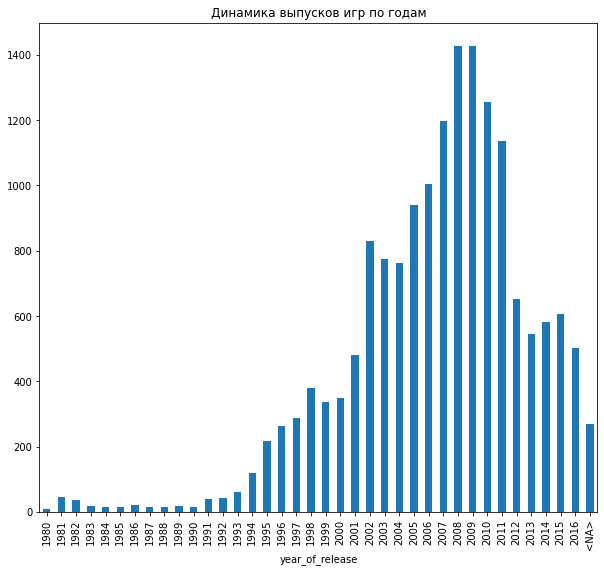

In [15]:
releases_by_years.plot.bar(figsize = (10, 9), title = 'Динамика выпусков игр по годам');

Совсем слабая активность примерно до середины 1990х годов, затем стремительный рост. Причины понятны:
прежде всего бурное развитие Интернета в 90е годы, заметный прогресс в совершенствовании и распространении ЦПУ 
и 3D графических процессоров и т.д. Начиная с 2012 года наблюдается некоторый откат.

### Динамика продаж по платформам

Посмотрим на динамику по платформам

In [16]:
#Составим сводную таблицу с разбивкой по годам
platforms_pivot_by_years_na = data.loc[:, ['year_of_release', 'platform', 'total_sales'] ].pivot_table(index = 'year_of_release', columns = ['platform'], values = 'total_sales', aggfunc = 'sum')
#Отсутствующие значения заполним нулями
platforms_pivot_by_years = platforms_pivot_by_years_na.fillna(0)
display(platforms_pivot_by_years);

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


По этой таблице трудно что-то понять. Выделим несколько самых популярных платформ и посмотрим на них повнимательней.

In [17]:
#Составим сводную таблицу для самых популярных платформ
platform_pivot_for_sales = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)
display(platform_pivot_for_sales)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем шесть платфор с самыми большими объёмами продаж (седьмая отличается по этому показателю от предыдущей уже вдвое): 
'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'

In [18]:
#Составим список, он нам пригодится
biggest_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Посмотрим распределение по годам

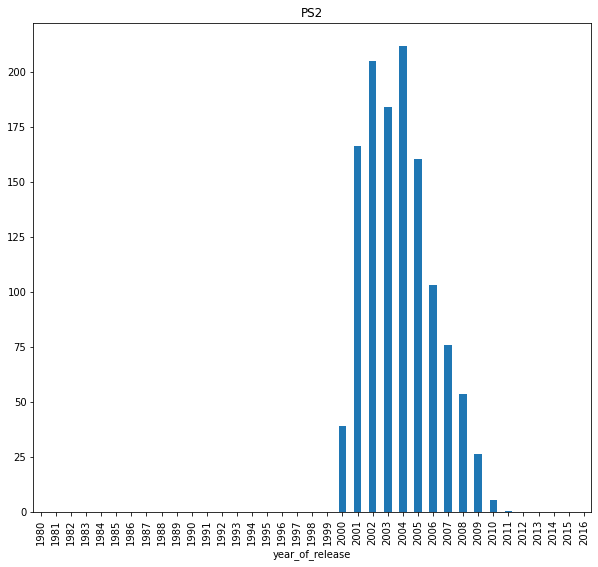

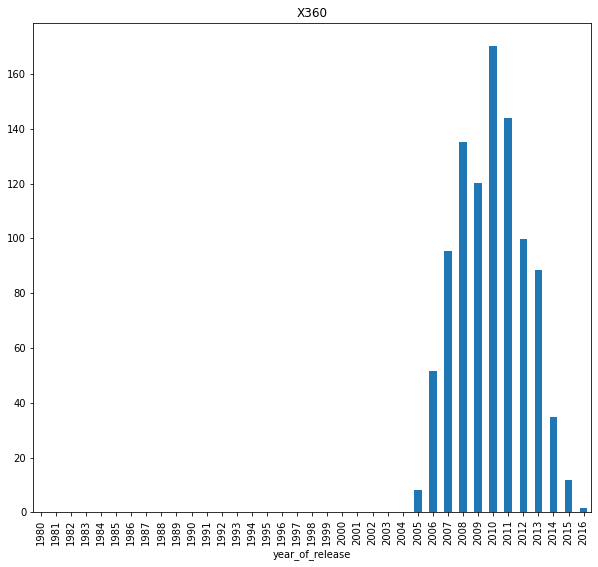

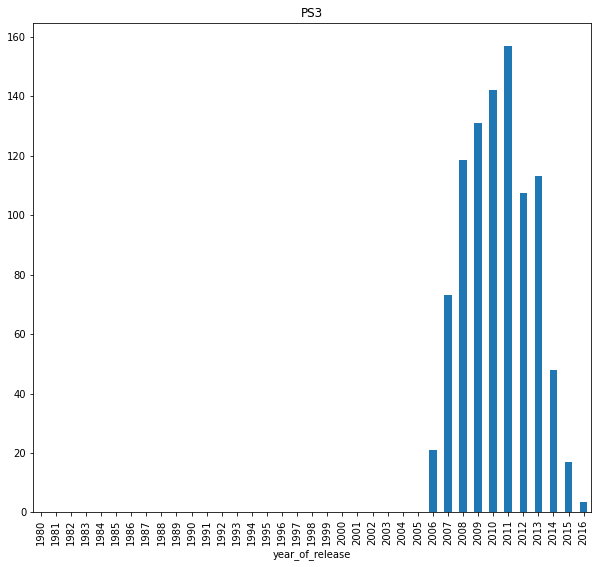

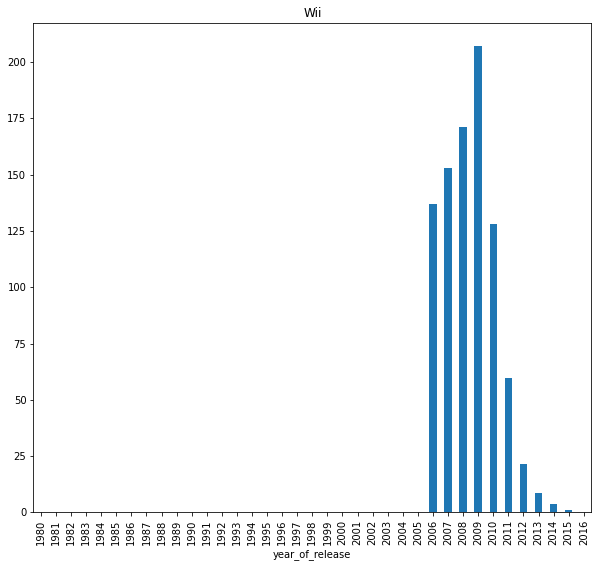

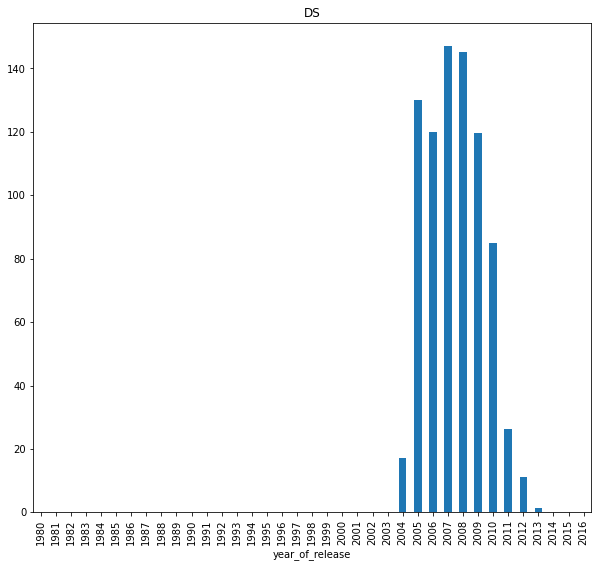

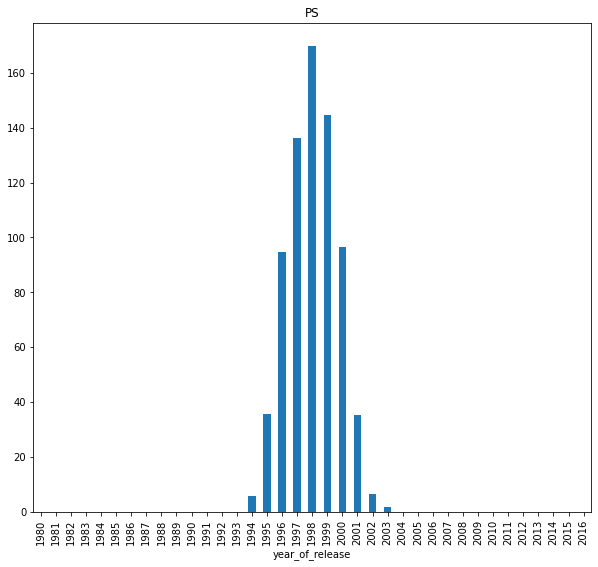

In [19]:
#Построим цикл на шести самых популярны платформах

for el in biggest_platforms:
    platforms_pivot_by_years[el].plot.bar(figsize = (10, 9), title = el)
    plt.show();

Найдем среднее время жизни для всех платформ и шести самых популярных

In [20]:
#Построим два цикла - для всех платформ и для списка самых популярных
sum = 0;
for el in platforms_pivot_by_years.columns.tolist():
    sum += platforms_pivot_by_years_na.notna()[el].sum()
    
print(sum/31)
sum = 0
for el in biggest_platforms:
    sum += platforms_pivot_by_years_na.notna()[el].sum()
    
print(sum/6)

7.67741935483871
11.166666666666666


Среднее время жизни для всех платформ - 7,7 лет, для самых популярных - около 11. 

Последний год датасета - 2016. Будем считать "актуальным" период, начиная с 2014 года. Это период характеризуется определённым спадом после взрывного роста предшествующих 10-15 лет.

In [21]:
#Сократим датасет до текущего периода
current_data = data.query('year_of_release >= 2014')
current_data_for_biggest_platforms = current_data.query('platform in @biggest_platforms')
platforms_pivot_by_years_current = platforms_pivot_by_years.query('year_of_release >= 2014')
platforms_pivot_by_years_current = platforms_pivot_by_years_current.loc[:, (platforms_pivot_by_years_current**2).sum() != 0]



In [22]:
platforms_pivot_by_years_current.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


### Текущие тенденции в лидирующих платформах и перспективы доходности

Безусловным лидером является PlayStation 2 компании Sony. Как мы видим, популярные платформы живут в среднем около 11 лет 
(при этом проявляя довольно небольшой разброс от этой величины). По 3-4 года на каждую из трех стадий - набор популярности, пик и спад. Практически все шесть популярных платформ, судя по всему, прошли весь свой жизненный цикл. Теоретически, с точки 
зрения будущей прибыльности можно обратиться к платформам за пределами ТОП6. 

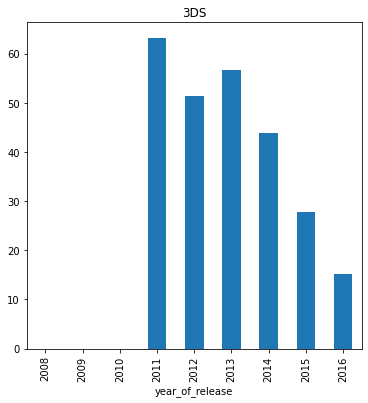

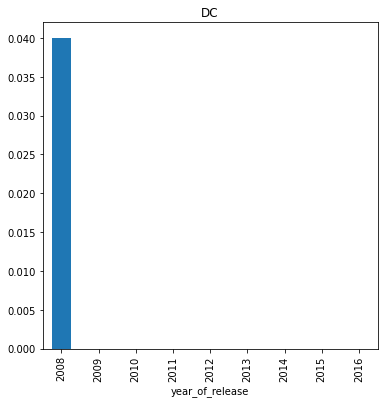

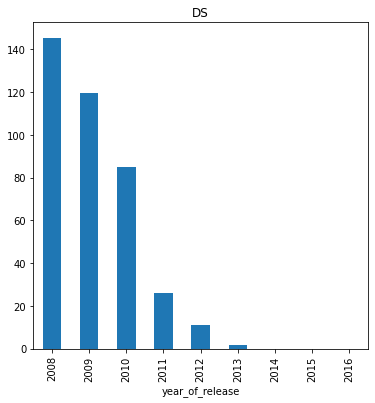

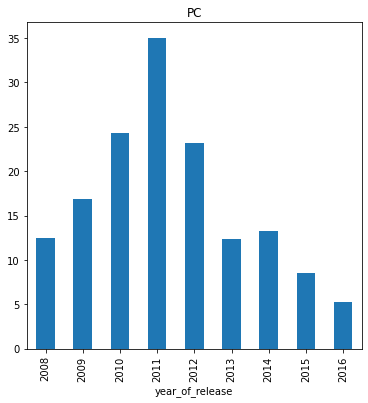

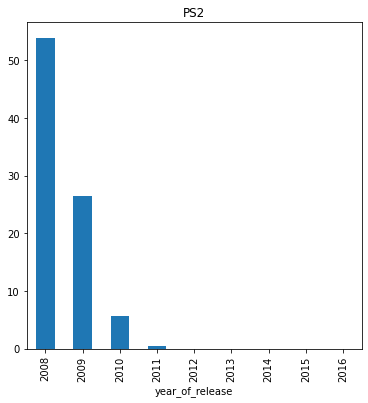

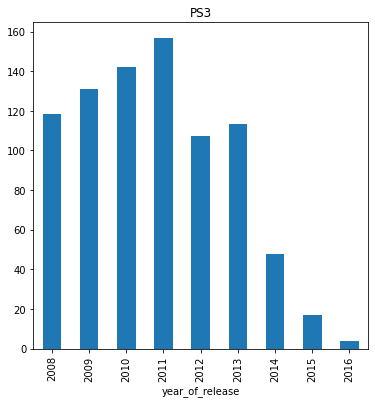

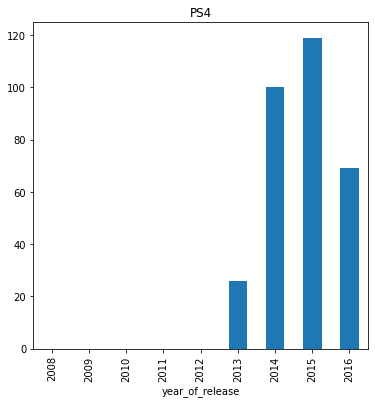

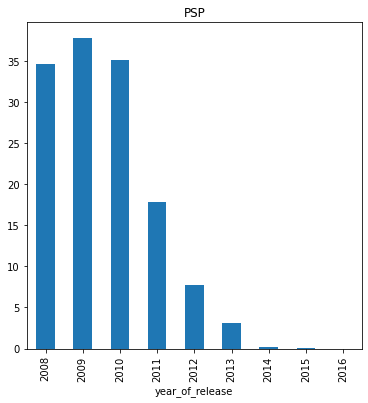

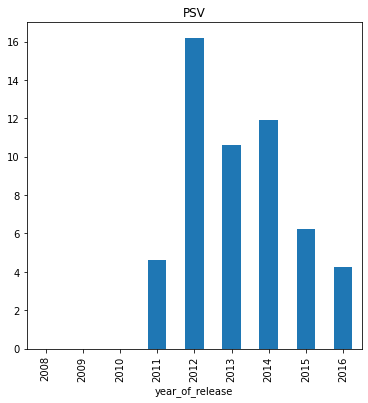

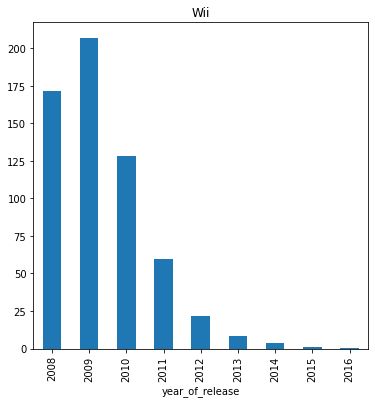

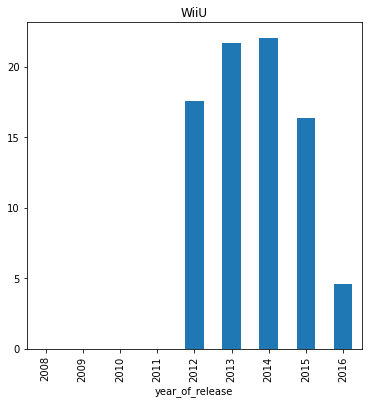

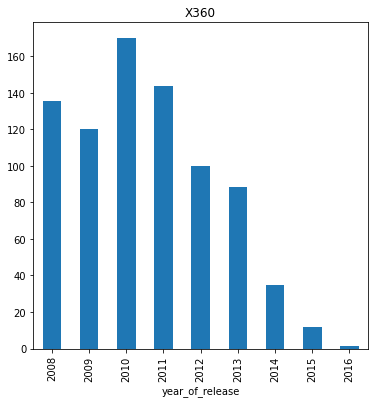

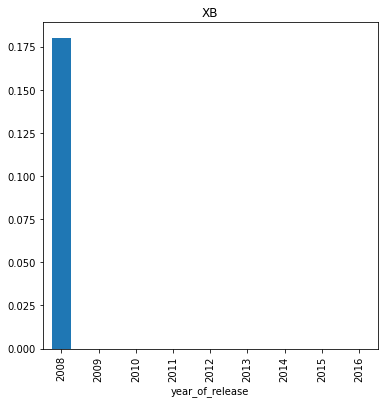

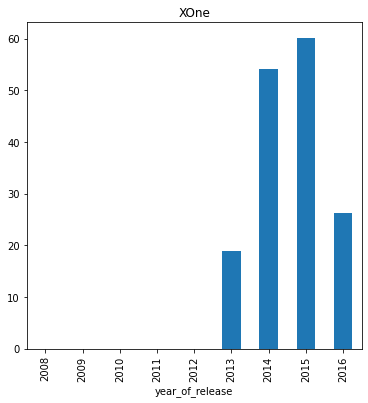

In [23]:
platforms_pivot_by_years_for_seven = platforms_pivot_by_years.query('year_of_release >= 2008')
platforms_pivot_by_years_for_seven = platforms_pivot_by_years_for_seven.\
loc[:, (platforms_pivot_by_years_for_seven**2).sum() != 0]
for el in platforms_pivot_by_years_for_seven.columns.tolist():
    platforms_pivot_by_years_for_seven[el].plot.bar(figsize = (6, 6), title = el)
    plt.show();

Какие платформы нам могут быть интересны? 
1. Во-первых, средний срок жизни платформы, как видели, весьма недолог, порядка 11 лет для самых успешных. Поэтому сразу отбросим платформы, для которых безжалостное колесо Сансары,  с большой вероятностью, уже вскоре совершит свой полный оборот, т.е. платформы, появившиеся на свет больше 5-6 лет назад. В связи с этим, по понятной необходимости, мы несколько расширили временные рамки по сравнению с выбранным нами "актуальным" трехлетним периодом, однако и не стали делать их слишком широкими, ограничив 7 годами). 
2. С другой стороны, как мы видели, некоторые платформы не переживают и двух лет. Поэтому введем еще один критерий: доход за прошлый, т.е. 2015 год, не должен быть существенно ниже дохода за год, предшествующий прошлому, т.е. за 2014 год.
Таким требованиям отвечают всего две платформы. PS4 (три полных года с момента выхода, доход на текущий момент - 314 миллионов долларов дохода) и XOne компании Microsoft (три полных года существования, доход 159 миллионов долларов). Исходя из имеющегося опыта и текущих тенеденций, можно предположить, что  наибольшие шансы собрать самый щедрый урожай денежных поступлений имеет новейший продукт компании Sony. 

### Характеристика распределения доходов 


Построим "ящик с усами"

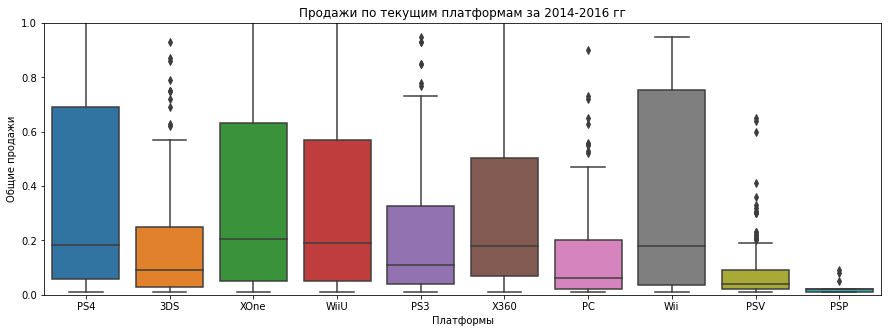

In [24]:
#построим "ящик с усами" для всех платформ
plt.figure(figsize=(15, 5))
sns.boxplot(data = current_data, y = 'total_sales', x='platform'). \
set(title = 'Продажи по текущим платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи', ylim=(0, 1))
plt.show()

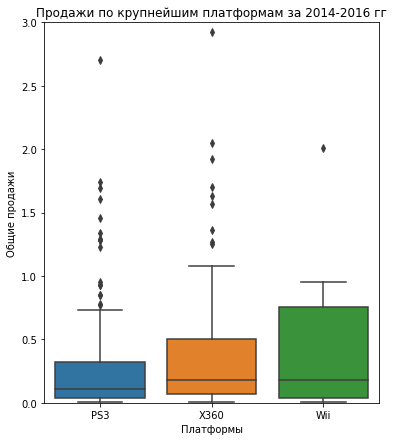

In [25]:
#построим "ящик с усами" для крупнейших платформ
plt.figure(figsize=(6, 7))
sns.boxplot(data = current_data_for_biggest_platforms, y = 'total_sales', x='platform'). \
set(title = 'Продажи по крупнейшим платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

Характерный паттерн: медиана практически везде явно ниже средней, распределение скошено вправо (положительно ассиметричное). Можно предположить, что игры как правило обеспечивают умеренный доход или даже оказываются убыточными, но если "выстреливают", то нередко приносят сверхприбыль, которая с лихвой способна окупить все предшествующие потери. Отметим еще, что из шести исторически самых успешных платформ к текущему периоду выбыли три.  

### Установление корреляционной связи между продажами и отзывами пользователей/критиков 

Целесообразно выбрать платформу для анализа корреляция, опираясь на количество непустых оценок как от пользователей, 
так и от зрителей. Посмотрим как обстоит с этим дело у разных платформ:

In [26]:
data.pivot_table(index = 'platform', values = ['user_score', 'critic_score'], aggfunc = 'count').\
query('critic_score !=0 & user_score!= 0')


,critic_score,user_score
platform,,
3DS,168,174
DC,14,14
DS,717,516
GBA,438,255
GC,448,366
PC,715,770
PS,200,162
PS2,1298,1241
PS3,820,877


Очевидный выбор, ожидаемо, PS2. У неё всё хорошо обстоит, с количеством оценок как от зрителей, так и от критиков

In [27]:

ps2_platform_user_score = data.query('platform == "PS2" & user_score.notna() == True')

ps2_platform_critic_score = data.query('platform == "PS2" & critic_score.notna() == True')



In [28]:
corr1 = ps2_platform_user_score['total_sales'].corr(ps2_platform_user_score['user_score']) 
corr2 = ps2_platform_critic_score['total_sales'].corr(ps2_platform_critic_score['critic_score'])

print('Корреляция между продажами и оценкой зрителей:', corr1)
print ('Корреляция между продажами и оценкой критиков:', corr2)

Корреляция между продажами и оценкой зрителей: 0.16422781496214145
Корреляция между продажами и оценкой критиков: 0.3954345494545487


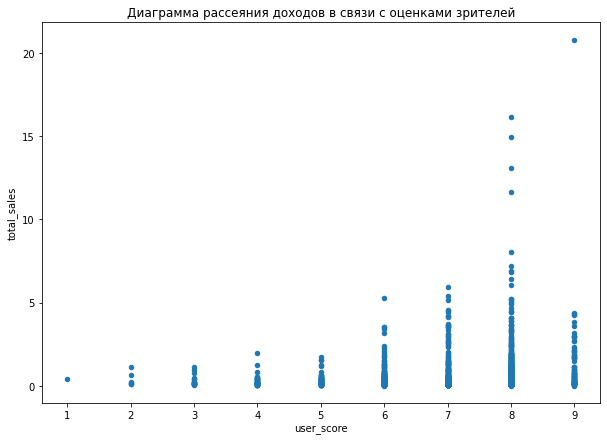

In [29]:
ps2_platform_user_score.plot(
    kind='scatter', 
    x='user_score', 
    y='total_sales', 
    figsize = (10,7),
    title = 'Диаграмма рассеяния доходов в связи с оценками зрителей') ;

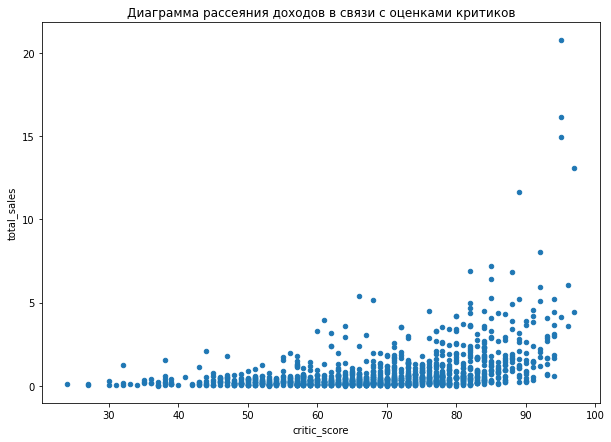

In [30]:
ps2_platform_critic_score.plot(
    kind='scatter', 
    x='critic_score', 
    y='total_sales', 
    figsize = (10,7),
    title = 'Диаграмма рассеяния доходов в связи с оценками критиков');

Несколько неожиданно, что корреляция между оценками пользователей и продажами очень слабая. Связь между продажами и оценками критиков заметно выше, хотя тоже попадает в категорию "слабая". 

Впрочем, несложно убедиться, что это не случайный, а довольно устойчивый паттерн. Крайне слабая корреляция с оценками зрителей, и просто слабая корреляция с оценками критиков.

In [31]:
def score_cor(plat, df, column1, column2, column3, column4):
    platform_user = df.loc[(data[column1] == plat) & (df[column2].notna() ==True)]
    platform_critic = df.loc[(data[column1] == plat) & (df[column2].notna() ==True)]                          
    corr1 = platform_user[column4].corr(platform_user[column2]) 
    corr2 = platform_critic[column4].corr(platform_critic[column3])
    return corr1, corr2

In [32]:
for el in platforms_pivot_by_years_current.columns.to_list():
    print('Платформа:', el, 'Корреляция с оценкой зрителей:', score_cor(el, current_data, 'platform', 'user_score', 'critic_score', 'total_sales')[0], 'Корреляция с оценкой критиков:', score_cor(el, current_data, 'platform', 'user_score', 'critic_score', 'total_sales')[1])

Платформа: 3DS Корреляция с оценкой зрителей: 0.19132047772966554 Корреляция с оценкой критиков: 0.28468579095782925
Платформа: PC Корреляция с оценкой зрителей: -0.09380206676369776 Корреляция с оценкой критиков: 0.17206091490145103
Платформа: PS3 Корреляция с оценкой зрителей: -0.17887455976101532 Корреляция с оценкой критиков: 0.44657460493190704
Платформа: PS4 Корреляция с оценкой зрителей: -0.029548306667432894 Корреляция с оценкой критиков: 0.40190287811475334
Платформа: PSP Корреляция с оценкой зрителей: nan Корреляция с оценкой критиков: nan
Платформа: PSV Корреляция с оценкой зрителей: -0.17040194142758033 Корреляция с оценкой критиков: 0.04102908974171329
Платформа: Wii Корреляция с оценкой зрителей: 1.0 Корреляция с оценкой критиков: nan
Платформа: WiiU Корреляция с оценкой зрителей: 0.40015098184753445 Корреляция с оценкой критиков: 0.3756402218389979
Платформа: X360 Корреляция с оценкой зрителей: -0.14256679378413728 Корреляция с оценкой критиков: 0.5257228356581523
Платфо

### Анализ популярности жанров

In [33]:
#Алгоритм построения диаграмм для жанров и платформ будет достаточно единообразным, поэтому имеет смысл определить функцию
def plot_building(df, column, region, method):
    pivot= df.pivot_table(index = column, values = region, aggfunc = method).sort_values(by = region, ascending = False)
    if column == 'platform':
        h = 9
        v = 8
    elif column == 'genre':
        h = 10
        v = 6
    
    plt.figure(figsize=(h, v)) 
    sns.barplot(y = pivot.index, x = region, data = pivot)
     

Посмотрим, какие жанры являются самыми популярными

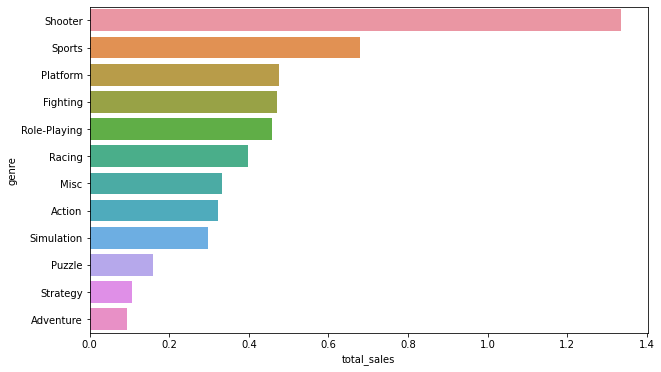

In [34]:
plot_building(current_data, 'genre', 'total_sales', 'mean')

Стрелялки, спортивные игры и платформеры  в тройке самых популярных жанров. В хвосте - жанры "Стратегии" и "Приключения". 

## Портрет пользователей по регионам

### Самые популярные платформы по регионам

#### Северная Америка

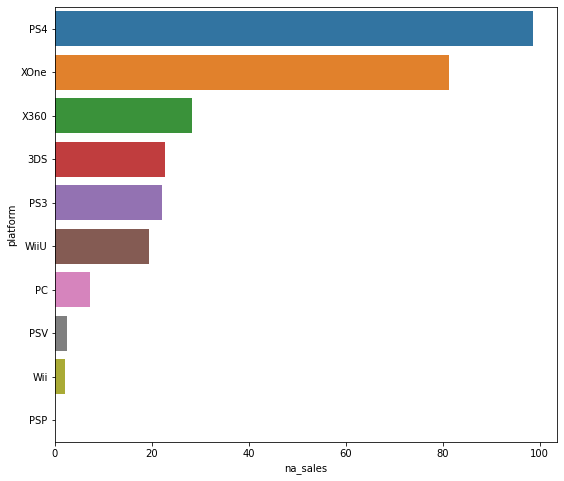

In [35]:
plot_building(current_data, 'platform', 'na_sales', 'sum')

#### Европейский Союз

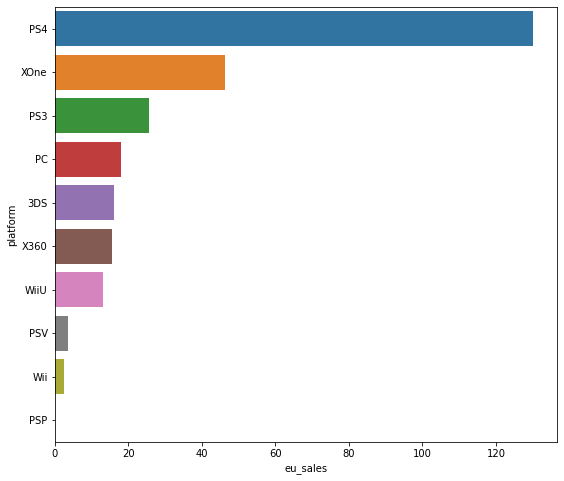

In [36]:
plot_building(current_data, 'platform', 'eu_sales', 'sum')

#### Япония

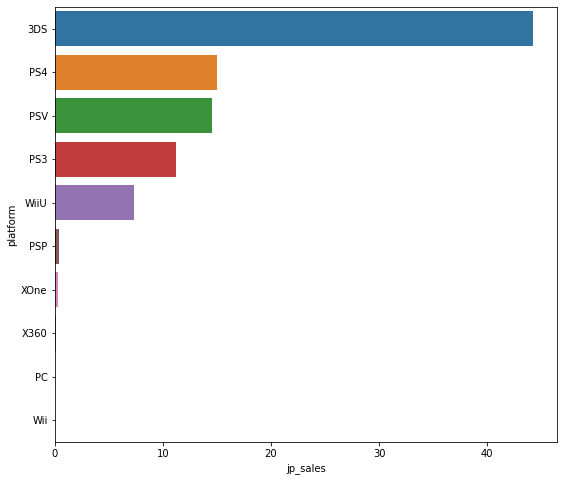

In [37]:
plot_building(current_data, 'platform', 'jp_sales', 'sum')

#### Другие страны

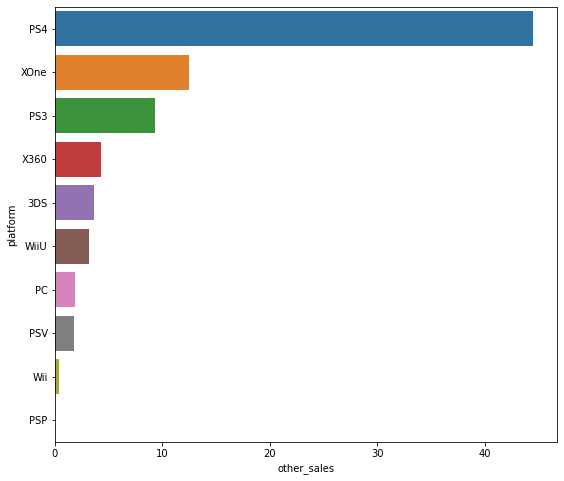

In [38]:
plot_building(current_data, 'platform', 'other_sales', 'sum')

Выводы: выделяются три крупнейших производителя: японская компания Sony с линейкой PlayStation, Microsoft со своими XBox-ами и  Nintendo с 3DS. Продукция японских фирм занимает первую позицию во всем мире. Даже в США, традиционно лояльных отечественной продукции, верхняя строчка по популярности принадлежит PS4. Япония характеризуется не только тем, что все три первых места завоеваны в сердах японцах местными производителями, но и тем, что там доминирует  консоль 3DS, которая в остальном мире не попадает даже в ТОП5. 

### Самые популярные жанры по регионам

#### Северная Америка

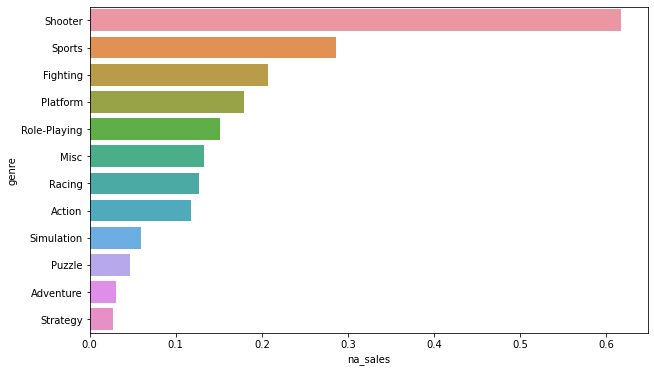

In [39]:

plot_building(current_data, 'genre', 'na_sales', 'mean')

#### Европейский Союз

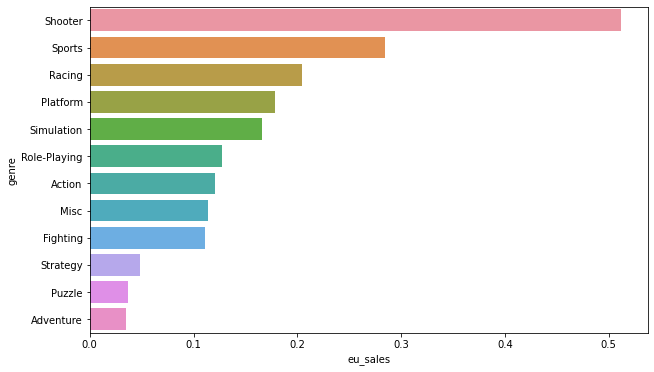

In [40]:

plot_building(current_data, 'genre', 'eu_sales', 'mean')

#### Япония

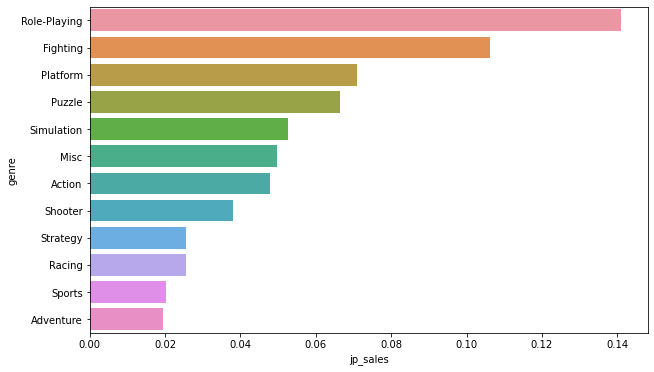

In [41]:
plot_building(current_data, 'genre', 'jp_sales', 'mean')

#### Другие страны

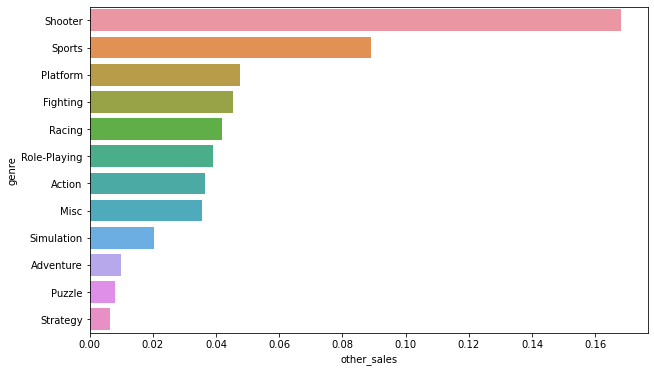

In [42]:
plot_building(current_data, 'genre', 'other_sales', 'mean')

В Европе, в Северной Америке, и в остальных странах в целом, на двух первых местах стрелялки и спортивные игры - такая ситуация, как в мире в целом. США отличается лишь тем, что на третьем месте здесь не платформеры, как в большинстве регионов, или в мире в целом, а файтинги. Особняком стоит Япония, где самым популярным жанром являются ролевые игры, мировые середнячки, а два следующих места занимают файтинги и платформеры. Напротив же, стрелялки, один из безусловных лидеров во всём мире, переместились там аж на восьмое место. Можно предположить, что это связано с культурными особенностями этой страны. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

Этот вопрос можно разделить на две части:
1. Как различаются между средние продажи игры для игр с рейтингом и без, т.е. насколько влияет наличие или отсутствие
рейтинга ESRB на продажи в тех или иных регионах. 
2. Как различаются средние продажи в расчёте на один релиз в зависимости от _конкретного_ рейтинга или отсутствия рейтинга


Рассмотрим первый вопрос

In [43]:
#Создали новый столбец 'bi_rating', куда поместили бинарное значение - "известен рейтинг"/"неизвестен рейтинг"
current_data = current_data.copy()
current_data['bi_rating'] = current_data['rating']
current_data['bi_rating'].where(current_data['rating']=='unknown', 'known', inplace = True);

In [44]:
#Создали сводную таблицу по бинарному значению с разбивкой по регионам с агрегированием по средней
rating_bi_grouping = current_data.pivot_table \
(index = 'bi_rating', values = ['total_sales','eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc = 'mean')

In [45]:
display(rating_bi_grouping);

,eu_sales,jp_sales,na_sales,other_sales,total_sales
bi_rating,,,,,
known,0.225245,0.038500,0.233340,0.067255,0.564340
unknown,0.078705,0.075968,0.086409,0.024566,0.265648


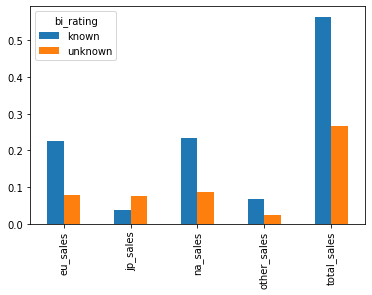

In [46]:
rating_bi_grouping.T.plot.bar();

Мы видим следующую картину: как мире в целом, так и большинстве регионов на средний релиз с _каким-нибудь_ рейтингом ESRB приходится больше доходов, чем на игры без рейтинга. Но опять особняком стоит Япония, где доход на средний релиз  без рейтинга ESRB более чем в два раза превышает сумму, которую в среднем собирает релиз, получивший оценку от Entertainment Software Rating Board.
Это может говорить о том, что в Японии сложилась собственная экосистема, в которой продукция местной индустрии цифровых игр пользуется безусловным авторитетом, а признание или непризнание тех или иных игр за пределами никак не влияет на их популярность
в пределах этой страны.

Теперь более внимательно посмотрим на то, как связаны средние продажи на один релиз с конкретными рейтингами ESRB с разбивкой по регионам. 

In [47]:
rating_grouping = current_data.query('rating.notna() == True').pivot_table \
(index = 'rating', values = ['total_sales','eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc = 'mean')

In [48]:
display(rating_grouping)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
rating,,,,,
E,0.265114,0.040822,0.231689,0.070274,0.607900
E10+,0.141405,0.024108,0.179622,0.042324,0.387459
M,0.352604,0.030226,0.363849,0.108189,0.854868
T,0.125720,0.054539,0.143727,0.041808,0.365793
unknown,0.078705,0.075968,0.086409,0.024566,0.265648


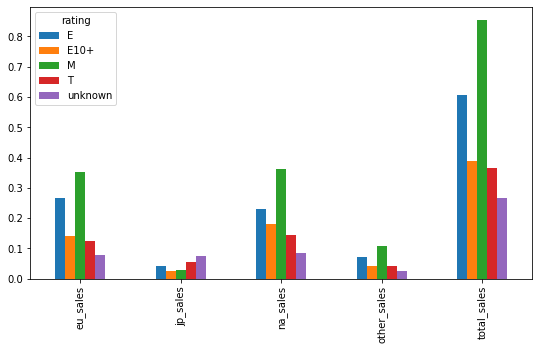

In [49]:
rating_grouping.T.plot.bar(figsize = (9, 5));

Что же мы видим? Если говорить об общемировой ситуации, и ситуации в большинстве регионов, самый большой доход приходится на средний релиз с рейтингом М (для взрослых). Далее следует рейтинг "без ограничений по возрасту" (E) и игры 10 лет + (Е10+). В конце списка - игры для подростков. Обращение к составу каждой категории рейтинга по жанрам дает нам не так много (см. ниже). Стоит разве что отметить, что среди игр с рейтингом М стрелялки обладают самой большой долей по сравнению с долей стрелялок в играх с другими рейтингами. А ведь именно стрелялки являются самым успешными играми с точки зрения доходов. Возможно, в рамках более подробного анализа можно было бы обратиться еще к доходности игр тех или иных жанров в рамках каждого рейтинга, но это выходит за рамки нашего исследования. В Японии, как обычно, ситуация уникальна даже с порядком популярности игр, отмеченных рейтингом.   На втором месте по популярности после отечественных игр в Японии стоят (очевидно зарубежные) игры, расчитанные на подростков. Они в среднем собирают сумму сопоставимую с суммой, которую в среднем зарабатывают на одной игре местные производители. Возможно, это говорит том, что японские подроски более подвержены влиянию американской культуры и вписаны в глобальный игровой рынок, чем представители более старших поколений. Возможно, отчасти это объясняется еще и тем, что в этой группе солидный процент составляют ролевые игры, чрезвычайно популярные, как мы видели в Японии. 

In [50]:
slice_for_ratings = current_data.pivot_table\
(index = 'rating', columns = 'genre', values = 'platform', aggfunc = 'count' ).fillna(0).astype(int)

In [51]:
slice_for_ratings['Sum'] = slice_for_ratings.sum(axis=1)

In [52]:
display(slice_for_ratings)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Sum
rating,,,,,,,,,,,,,
E,35,0,0,10,17,5,43,2,0,10,97,0,219
E10+,83,15,3,23,12,2,6,9,13,3,13,3,185
M,118,21,3,3,0,0,0,44,76,0,0,0,265
T,87,13,32,16,4,0,4,52,22,9,22,10,271
unknown,296,136,22,61,5,7,16,114,17,22,29,24,749


## Проверка гипотез

### Гипотеза 1

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

Мы сравниваем две генеральные совокупности (игры на платформе XBox и игры на платформе PC). У нас  достаточно большие и сопоставимые по размеру совокупности и нет оснований думать, что дисперсии этих совокупностей разные. Поэтому параметр var примем в значении по умолчанию True. 

In [53]:
score_data = current_data[current_data['user_score'].notna()==True]
print('Средний пользовательский рейтинг для платформ Xbox One', score_data.query('platform == "XOne"')['user_score'].mean())
print('Средний пользовательский рейтинг для платформы PC', score_data.query('platform == "PC"')['user_score'].mean())
print()

results = st.ttest_ind(
    score_data.query('platform == "XOne"')['user_score'], 
    score_data.query('platform == "PC"')['user_score'])

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг для платформ Xbox One 6.193939393939394
Средний пользовательский рейтинг для платформы PC 5.819672131147541

p-значение: 0.040304953182701546
Отвергаем нулевую гипотезу


Нет оснований утверждать, что пользовательские рейтинги платформ Xbox и PC разные.

### Гипотеза 2

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Мы сравниваем две генеральные совокупности (игры на жанров Action и Sports). У нас  достаточно большие 
и сопоставимые по размеру совокупности и нет оснований думать, что дисперсии этих совокупностей разные. Поэтому параметр var
примем в значении по умолчанию True. 

In [54]:

print('Средний пользовательский рейтинг для жанра Action', score_data.query('genre == "Action"')['user_score'].mean())
print('Средний пользовательский рейтинг для жанра Sports', score_data.query('genre == "Sports"')['user_score'].mean())


results = st.ttest_ind(
    score_data.query('genre == "Action"')['user_score'], 
    score_data.query('genre == "Sports"')['user_score'])

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг для жанра Action 6.28956228956229
Средний пользовательский рейтинг для жанра Sports 4.834645669291339
p-значение: 2.1299562188426056e-17
Отвергаем нулевую гипотезу


Есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Выводы

1. Мы изучили общую динамику рынка цифроых игр и обнаружили, что в период с 1980 по середину 1990 годов рынок пережил этап 
зарождения. Бурный же рост и формирование того рынка игр, который мы видим сегодня, с широким использованием Интернета, 
графическими 3D технологиями, использованием больших вычислительных ресурсов пришелся на период с конца 1990х по 2009 год, после чего произошел некоторый откат. 
2. Среднее время жизни платформы - около 8 лет для всех платформ, и около 11 лет для самых успешных. В настоящее время к 
успешным относятся платформы японских фирм (Sony и Nintendo) и американской фирмы Miscrosoft. 
3. Для доходов от цифровых игр характерно скошенное вправо распределение, с медианой смещённой в сторону низких доходов.
Это может свидительствовать о том, что для игровой отрасли свойственно преобладание умеренных доходов, с выбросами в виде 
сверхприбыли в случае удачи. 
4. Выделены две платформы PS4 и XOne как самые перспективные с точки зрения будущей доходности
5. Не обнаружено никакой заметной связи между пользовательскими оценками и доходами от игры. Связь между оценками
критиков и доходами присутствует, но относительно слабая.
6. Как и в случае с миром в целом, доминирование продукции Sony, Ninetendo и Microsoft сохраняется и на региональном уровне. Три производителя входят ТОП3 практически во всех регионах. Япония составляет некоторое исключение - там первую тройку составляют  исключительно отечетственные производители. 
7. По жанрам: стрелялки и спортивные игры занимают держат две первые позиции, как в мире в целом, так и в большинстве регионов. Третье место в зависимости от региона делят файтинги, гонки и платформеры. Особняком стоит всё та же Япония, где на первом месте - ролевые игры.
8. Во всём мире кроме Японии игры, которым назначен рейтинг ESRB, приносят в среднем в два раза больше дохода в расчете на один релиз, чем игры без рейтинга. По структуре - наиболее доходны игры с рейтингом М (для взрослых). И опять выделяется Япония, где наиболее доходны местные игры, а на втором месте игры с рейтингом Т (для подростков), что, вероятно, объсянется как большей интегрированностью японских подростков в мировой игровой рынок, так и существенной долей ролевых игр в рейтинге для подростков. 
9. Проверены гипотезы в отношении средних пользовательских рейтингов для платформ Xbox One и PC и жанров Action и Sports. В первом случае t-тест позовлил заключить, что нет оснований утверждать, что пользовательские рейтинги в двух совокупностях разные.
Во втором случае использование этого же теста позволило сделать вывод о том, что есть основания полагать, что средние пользовательские рейтинги двух совокупностей разные.